# Geocoding

https://developer.here.com/documentation/geocoder/topics/what-is.html

## Geocode using free-form input

https://developer.here.com/api-explorer/rest/geocoder/latitude-longitude-by-free-form-address

### Requests

In [1]:
from urllib.parse import quote
import requests

from credentials import APP_ID, APP_CODE

url = 'https://geocoder.api.here.com/6.2/geocode.json'
params = dict(
    searchtext=quote('Invalidenstr. 116, 10115 Berlin, Germany'),
    app_id=APP_ID, 
    app_code=APP_CODE
)
query = '&'.join(f'{k}={v}' for (k, v) in params.items())
requests.get(f'{url}?{query}').json()

{'Response': {'MetaInfo': {'Timestamp': '2018-11-07T22:07:36.833+0000'},
  'View': [{'_type': 'SearchResultsViewType',
    'ViewId': 0,
    'Result': [{'Relevance': 1.0,
      'MatchLevel': 'houseNumber',
      'MatchQuality': {'Country': 1.0,
       'City': 1.0,
       'Street': [1.0],
       'HouseNumber': 1.0,
       'PostalCode': 1.0},
      'MatchType': 'pointAddress',
      'Location': {'LocationId': 'NT_5v-U9-t5AZa5VsRdV06lLB_xEjN',
       'LocationType': 'point',
       'DisplayPosition': {'Latitude': 52.53086, 'Longitude': 13.38474},
       'NavigationPosition': [{'Latitude': 52.531, 'Longitude': 13.38461}],
       'MapView': {'TopLeft': {'Latitude': 52.5319842,
         'Longitude': 13.3828921},
        'BottomRight': {'Latitude': 52.5297358, 'Longitude': 13.3865879}},
       'Address': {'Label': 'Invalidenstraße 116, 10115 Berlin, Deutschland',
        'Country': 'DEU',
        'State': 'Berlin',
        'County': 'Berlin',
        'City': 'Berlin',
        'District': 'Mitt

### Geopy

In [2]:
from geopy.geocoders import Here
from credentials import APP_ID, APP_CODE

geocoder = Here(APP_ID, APP_CODE)
res = geocoder.geocode('Invalidenstr. 116, 10115 Berlin, Germany')

In [3]:
res

Location(Invalidenstraße 116, 10115 Berlin, Deutschland, Berlin, Berlin 10115, DEU, (52.53086, 13.38474, 0.0))

In [4]:
res.address

'Invalidenstraße 116, 10115 Berlin, Deutschland, Berlin, Berlin 10115, DEU'

In [5]:
res.raw

{'Relevance': 1.0,
 'MatchLevel': 'houseNumber',
 'MatchQuality': {'Country': 1.0,
  'City': 1.0,
  'Street': [1.0],
  'HouseNumber': 1.0,
  'PostalCode': 1.0},
 'MatchType': 'pointAddress',
 'Location': {'LocationId': 'NT_5v-U9-t5AZa5VsRdV06lLB_xEjN',
  'LocationType': 'point',
  'DisplayPosition': {'Latitude': 52.53086, 'Longitude': 13.38474},
  'NavigationPosition': [{'Latitude': 52.531, 'Longitude': 13.38461}],
  'MapView': {'TopLeft': {'Latitude': 52.5319842, 'Longitude': 13.3828921},
   'BottomRight': {'Latitude': 52.5297358, 'Longitude': 13.3865879}},
  'Address': {'Label': 'Invalidenstraße 116, 10115 Berlin, Deutschland',
   'Country': 'DEU',
   'State': 'Berlin',
   'County': 'Berlin',
   'City': 'Berlin',
   'District': 'Mitte',
   'Street': 'Invalidenstraße',
   'HouseNumber': '116',
   'PostalCode': '10115',
   'AdditionalData': [{'value': 'Deutschland', 'key': 'CountryName'},
    {'value': 'Berlin', 'key': 'StateName'},
    {'value': 'Berlin', 'key': 'CountyName'}]}}}

### Ipyrest

In [6]:
from urllib.parse import quote

from ipyrest import Api
from credentials import APP_ID, APP_CODE

url = 'https://geocoder.api.here.com/6.2/geocode.json'
params = dict(
    searchtext=quote('Invalidenstr. 116, 10115 Berlin, Germany'),
    app_id=APP_ID, 
    app_code=APP_CODE
)
Api(url, params=params)

Api(children=(HBox(children=(Dropdown(layout=Layout(width='100%px'), options=('GET', 'POST', 'PUT', 'PATCH', '…

## Geocode an address within a bounding box

https://developer.here.com/api-explorer/rest/geocoder/latitude-longitude-by-mapview-parameter

In [7]:
url = 'https://geocoder.api.here.com/6.2/geocode.json'
params = dict(
    searchtext=quote('1 main'),
    mapview='42.3902,-71.1293;42.3312,-71.0228',
    gen='9',
    app_id=APP_ID, 
    app_code=APP_CODE
)
Api(url, params=params, click_send=True)

Api(children=(HBox(children=(Dropdown(layout=Layout(width='100%px'), options=('GET', 'POST', 'PUT', 'PATCH', '…

## Geocode using partial address information

https://developer.here.com/api-explorer/rest/geocoder/latitude-longitude-by-partial-address

In [8]:
url = 'https://geocoder.api.here.com/6.2/geocode.json'
params = dict(
    housenumber='427',
    street='randolph',
    city='chicago',
    country='usa',
    gen='9',
    app_id=APP_ID, 
    app_code=APP_CODE
)
api = Api(url, params=params, click_send=True)
api

Api(children=(HBox(children=(Dropdown(layout=Layout(width='100%px'), options=('GET', 'POST', 'PUT', 'PATCH', '…

In [9]:
api.resp.json()['Response']['View'][0]['Result'][0]['Location']

{'LocationId': 'NT_Opil2LPZVRLZjlWNLJQuWB_0IzN',
 'LocationType': 'address',
 'DisplayPosition': {'Latitude': 41.8843349, 'Longitude': -87.6392752},
 'NavigationPosition': [{'Latitude': 41.8844697, 'Longitude': -87.6392792}],
 'MapView': {'TopLeft': {'Latitude': 41.885459, 'Longitude': -87.6407852},
  'BottomRight': {'Latitude': 41.8832107, 'Longitude': -87.6377653}},
 'Address': {'Label': '427 W Randolph St, Chicago, IL 60606, United States',
  'Country': 'USA',
  'State': 'IL',
  'County': 'Cook',
  'City': 'Chicago',
  'District': 'West Loop',
  'Street': 'W Randolph St',
  'HouseNumber': '427',
  'PostalCode': '60606',
  'AdditionalData': [{'value': 'United States', 'key': 'CountryName'},
   {'value': 'Illinois', 'key': 'StateName'},
   {'value': 'Cook', 'key': 'CountyName'},
   {'value': 'N', 'key': 'PostalCodeType'}]}}

## Geocode a street intersection

https://developer.here.com/api-explorer/rest/geocoder/latitude-longitude-intersection

In [10]:
url = 'https://geocoder.api.here.com/6.2/geocode.json'
params = dict(
    street='invaliden @ chaussee',
    city='berlin',
    country='germany',
    gen='9',
    app_id=APP_ID, 
    app_code=APP_CODE
)
api = Api(url, params=params, click_send=True)
api

Api(children=(HBox(children=(Dropdown(layout=Layout(width='100%px'), options=('GET', 'POST', 'PUT', 'PATCH', '…

In [11]:
api.resp.json()['Response']['View'][0]['Result'][0]['Location']

{'LocationId': 'NT_5v-U9-t5AZa5VsRdV06lLB_x_QCxCphrBf94EOQRDWbXtCC',
 'LocationType': 'address',
 'DisplayPosition': {'Latitude': 52.53058, 'Longitude': 13.38307},
 'NavigationPosition': [{'Latitude': 52.53058, 'Longitude': 13.38307}],
 'MapView': {'TopLeft': {'Latitude': 52.5395732, 'Longitude': 13.3682867},
  'BottomRight': {'Latitude': 52.5215868, 'Longitude': 13.3978533}},
 'Address': {'Label': 'Invalidenstraße & Chausseestraße, 10115 Berlin, Deutschland',
  'Country': 'DEU',
  'State': 'Berlin',
  'County': 'Berlin',
  'City': 'Berlin',
  'District': 'Mitte',
  'Street': 'Invalidenstraße & Chausseestraße',
  'PostalCode': '10115',
  'AdditionalData': [{'value': 'Deutschland', 'key': 'CountryName'},
   {'value': 'Berlin', 'key': 'StateName'},
   {'value': 'Berlin', 'key': 'CountyName'}]}}

## Reverse geocode an address from a location

https://developer.here.com/api-explorer/rest/geocoder/reverse-geocode

In [12]:
url = 'https://reverse.geocoder.api.here.com/6.2/reversegeocode.json'
params = dict(
    prox='41.8842,-87.6388,250',
    mode='retrieveAddresses',
    maxresults='1',
    gen='9',
    app_id=APP_ID, 
    app_code=APP_CODE
)
api = Api(url, params=params, click_send=True)
api

Api(children=(HBox(children=(Dropdown(layout=Layout(width='100%px'), options=('GET', 'POST', 'PUT', 'PATCH', '…

In [13]:
api.resp.json()['Response']['View'][0]['Result'][0]['Location']

{'LocationId': 'NT_Opil2LPZVRLZjlWNLJQuWB_0ITN',
 'LocationType': 'address',
 'DisplayPosition': {'Latitude': 41.88432, 'Longitude': -87.63877},
 'NavigationPosition': [{'Latitude': 41.88449, 'Longitude': -87.63877}],
 'MapView': {'TopLeft': {'Latitude': 41.8854442, 'Longitude': -87.64028},
  'BottomRight': {'Latitude': 41.8831958, 'Longitude': -87.63726}},
 'Address': {'Label': '425 W Randolph St, Chicago, IL 60606, United States',
  'Country': 'USA',
  'State': 'IL',
  'County': 'Cook',
  'City': 'Chicago',
  'District': 'West Loop',
  'Street': 'W Randolph St',
  'HouseNumber': '425',
  'PostalCode': '60606',
  'AdditionalData': [{'value': 'United States', 'key': 'CountryName'},
   {'value': 'Illinois', 'key': 'StateName'},
   {'value': 'Cook', 'key': 'CountyName'},
   {'value': 'N', 'key': 'PostalCodeType'}]},
 'MapReference': {'ReferenceId': '776372180',
  'MapId': 'NAAM18133',
  'MapVersion': 'Q1/2018',
  'MapReleaseDate': '2018-10-30',
  'Spot': 0.52,
  'SideOfStreet': 'right',


## Reverse geocode the shape of a postal code

https://developer.here.com/api-explorer/rest/geocoder/reverse-geocode-postal-shape

In [21]:
url = 'https://reverse.geocoder.api.here.com/6.2/reversegeocode.json'
params = dict(
    prox='41.8842,-87.6388,250',
    # prox='52.5,13.4,250',
    mode='retrieveAddresses',
    maxresults='1',
    additionaldata='IncludeShapeLevel,postalCode',
    gen='9',
    app_id=APP_ID, 
    app_code=APP_CODE
)
api = Api(url, params=params, click_send=True)
api

Api(children=(HBox(children=(Dropdown(layout=Layout(width='100%px'), options=('GET', 'POST', 'PUT', 'PATCH', '…

In [22]:
wkt_shape = api.resp.json()['Response']['View'][0]['Result'][0]['Location']['Shape']['Value']
wkt_shape

'MULTIPOLYGON (((13.41694 52.50406, 13.41673 52.50377, 13.41675 52.50372, 13.41668 52.50369, 13.41614 52.50295, 13.41616 52.5029, 13.41608 52.50287, 13.41594 52.50291, 13.41585 52.50291, 13.41587 52.50299, 13.41591 52.503, 13.41673 52.5042, 13.41678 52.50426, 13.41685 52.50429, 13.41687 52.50424, 13.41685 52.50421, 13.41693 52.50421, 13.41699 52.50414, 13.41701 52.50409, 13.41694 52.50406)), ((13.3958 52.49761, 13.39582 52.49769, 13.39584 52.49769, 13.39586 52.49775, 13.39677 52.49765, 13.39799 52.49745, 13.3987 52.49723, 13.39883 52.49741, 13.39839 52.49756, 13.39766 52.49772, 13.39637 52.49791, 13.39599 52.49794, 13.39589 52.49792, 13.39586 52.49793, 13.3958 52.49788, 13.39562 52.4978, 13.3956 52.49782, 13.39546 52.49774, 13.3951 52.49763, 13.39486 52.49761, 13.39485 52.49765, 13.39523 52.49776, 13.3947 52.49778, 13.39413 52.49775, 13.39205 52.49751, 13.39206 52.49745, 13.39203 52.4974, 13.39197 52.49744, 13.39195 52.4975, 13.39129 52.49746, 13.39064 52.49747, 13.39011 52.49752, 13.3

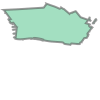

In [24]:
import shapely.wkt
shapely.wkt.loads(wkt_shape)

Real maps coming, soon!